In [1]:
import moleculegraph
import numpy as np
import toml
import unittest
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#gly = "[OH][C][b1][=O][C][NH2]" 
#ala = "[OH][C][b1][=O][C][b1][C][NH2]" 
#arg = "[OH][C][b1][=O][C][b5][C][C][C][NH][b1][NH][H2N][NH2]" 
#phe = "[OH][C][b1][=O][C][b7][C][C1][C2][C3][C4][C5][C6][r6][NH2]" 

gly = "[C][b1][=O][C][NH]" 
ala = "[C][b1][=O][C][b1][CH3][NH]" 
arg = "[C][b1][=O][C][b5][C][C][C][NH][b1][NH][H2N][NH]" 
phe = "[C][b1][=O][C][b7][C][C1][C2][C3][C4][C5][C6][r6][NH]" 

amino_acids = {}
amino_acids["gly"] = gly
amino_acids["ala"] = ala
amino_acids["arg"] = arg
amino_acids["phe"] = phe


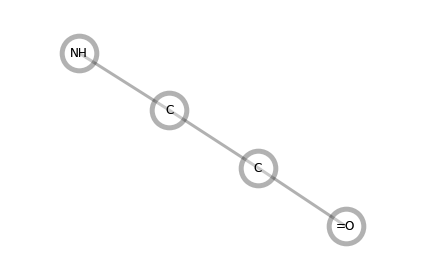

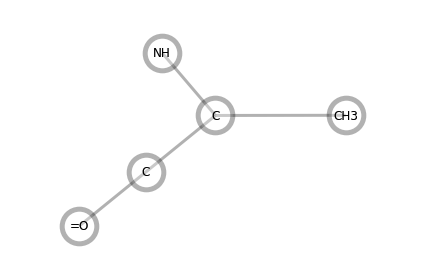

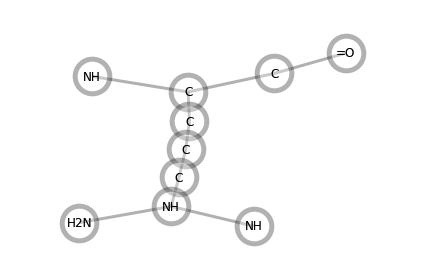

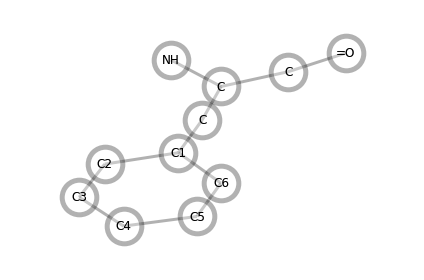

In [3]:
for aa in amino_acids:
    dummy = moleculegraph.molecule(amino_acids[aa])
    dummy.visualize()

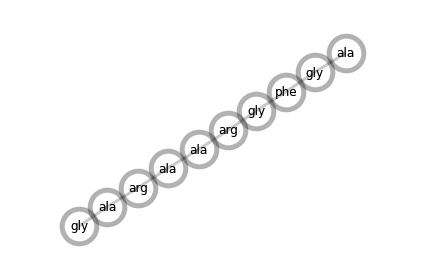

In [5]:
protein = "[ala][gly][phe][gly][arg][ala][ala][arg][ala][gly]"
#protein = "[ala][ala][gly]"

protein_aa = moleculegraph.molecule(protein)

protein_aa.visualize()

[C][b1][=O][C][b1][CH3][NH][C][b1][=O][C][NH][C][b1][=O][C][b7][C][C1][C2][C3][C4][C5][C6][r6][NH][C][b1][=O][C][NH][C][b1][=O][C][b5][C][C][C][NH][b1][NH][H2N][NH][C][b1][=O][C][b1][CH3][NH][C][b1][=O][C][b1][CH3][NH][C][b1][=O][C][b5][C][C][C][NH][b1][NH][H2N][NH][C][b1][=O][C][b1][CH3][NH][C][b1][=O][C][NH]


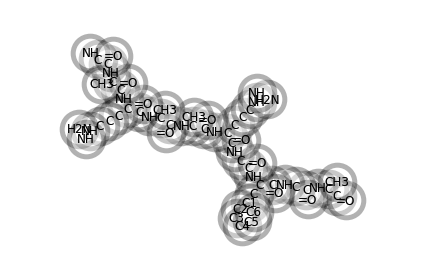

In [6]:
full_protein_string = "".join(protein_aa.map_molecule_via_atom_names(amino_acids))
print(full_protein_string)

full_protein = moleculegraph.molecule(full_protein_string)

full_protein.visualize()


expected = ['[C][C]', '[C][NH]', '[C][NH]', '[C][C]', '[C][NH]', '[C][NH]',
       '[C][C]', '[C][NH]', '[C][NH]', '[C][C]', '[C][NH]', '[C][NH]',
       '[C][C]', '[C][NH]', '[C][NH]', '[C][C]', '[C][NH]', '[C][NH]',
       '[C][C]', '[C][NH]', '[C][NH]', '[C][C]', '[C][NH]', '[C][NH]',
       '[C][C]', '[C][NH]', '[C][NH]', '[C][C]', '[C][NH]', '[=O][C]',
       '[C][CH3]', '[=O][C]', '[=O][C]', '[C][C]', '[C1][C]', '[C1][C2]',
       '[C2][C3]', '[C3][C4]', '[C4][C5]', '[C5][C6]', '[C1][C6]',
       '[=O][C]', '[=O][C]', '[C][C]', '[C][C]', '[C][C]', '[C][NH]',
       '[H2N][NH]', '[NH][NH]', '[=O][C]', '[C][CH3]', '[=O][C]',
       '[C][CH3]', '[=O][C]', '[C][C]', '[C][C]', '[C][C]', '[C][NH]',
       '[H2N][NH]', '[NH][NH]', '[=O][C]', '[C][CH3]', '[=O][C]']

tc = unittest.TestCase()
tc.assertListEqual( sorted(list(full_protein.bond_keys)), sorted(list(expected)), "lists not equal" ) 

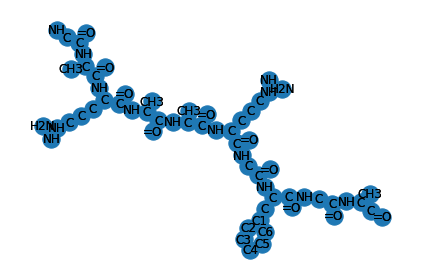

In [7]:
graph = nx.Graph()
for b0, b1 in full_protein.bond_list:
    graph.add_edge(b0, b1)

labels = {}
for i, name in enumerate(full_protein.atom_names):
    labels[i] = name

pos = nx.kamada_kawai_layout(graph)

nx.draw_networkx(graph, pos, labels=labels, )
nx.draw_networkx_labels(graph, pos, labels, font_size=12, font_color="black")

ax = plt.gca()
plt.axis("off")
plt.tight_layout()

plt.show()